# Linear Latent Space Interpolation:

In this notebook we explore the linear latent space interpolation procedure. 

**Importing the packages:**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from functions import *
os.environ["CUDA_VISIBLE_DEVICES"]="-1"  ###DISABLES the GPU if needed###

**Checkpoint settings:**

Here we load the checkpoints saved during training. To use the code for plotting your own pre-saved results, change the checkpoint_name and the other settings accordingly. **z** here is the size of the random noise input vector, **output_size** is the size of the output images and the **batch_size** parameter is the number of output images to be produced. Note that **batch_size** has to be the same as it was set during the training process otherwise the checkpoint will not be loaded correctly. 

In [2]:
checkpoint_name = "checkpoints_cw_scaled_lr_0p00003_redshift_z0p0_z1p0"
checkpoint_dir_pt = './checkpoints/' + checkpoint_name + '/' + 'run_0' ## All checkpoints are save along with their run number

checkpoint_epoch = 30000 
show_plots = True

## The other settings:
z = 256
output_size = 256
batch_size = 64 ## The batch size. Note that if the checkpoint was trained for batch_size=64, the Loader will not work for a different batch size

**Loading some samples:**





The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



 [*] Reading checkpoints...
Checkpoint for  epoch epoch doesn't exist. Using latest checkpoint instead!
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./checkpoints/checkpoints_cw_scaled_lr_0p00003_redshift_z0p0_z1p0/run_0/dcgan.model-step-28500
 [*] Success to read dcgan.model-step-28500
 [*] Reading checkpoints...
Checkpoint for  epoch epoch doesn't exist. Using latest checkpoint instead!
INFO:tensorflow:Restoring parameters from ./checkpoints/checkpoints_cw_scaled_lr_0p00003_redshift_z0p0_z1p0/run_0/dcgan.model-step-28500
 [*] Success to r

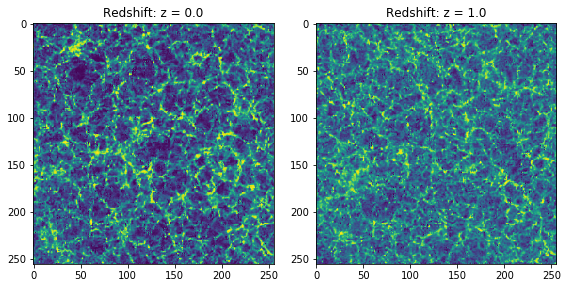

In [3]:
## Loading some pre-saved latent space inputs that correspond to cosmic web slices of redshifts z = 1.0 
## and z = 0.0:
Z1 = np.load("./data/Z1_newest2.npy")
Z2 = np.load("./data/Z2_newest2.npy")


## Reshaping:
Z2_input =  np.ones((64,256)) * Z2
Z1_input =  np.ones((64,256)) * Z1

## Now we can feed the loaded Z's into the generator neural network via the loader function:
X1 = Load_samples(Z1_input,checkpoint_dir_pt, checkpoint_epoch,output_size=256,z=256)
X2 = Load_samples(Z2_input,checkpoint_dir_pt, checkpoint_epoch,output_size=256,z=256)

## Plotting X1 & X2: 

plt.figure(figsize = (8,4.5))
plt.subplot(1, 2, 1)
plt.imshow(np.squeeze(X1[0]))
plt.title("Redshift: z = 0.0")
plt.subplot(1, 2, 2)
plt.imshow(np.squeeze(X2[0]))
plt.title("Redshift: z = 1.0")
plt.tight_layout()

**Interpolating between the samples:**

Interpolating between the two input vectors $Z_{1}$ and $Z_{2}$ refers to finding a line connecting them and then sampling a number of points on that line as inputs to the generator neural network $G_{\phi}(Z)$. In particular, we treat $Z_{1}$ and $Z_{2}$ as points in a 256-dimensional space and then find a line connecting those two points. Subsequently, a batch of points from that line are input into the generator $G_{\phi}(Z)$ to produce a batch of interpolated cosmic web slices. The interpolated cosmic web slices correspond to a continiuos transition between the cosmic web slices of redshift $z = 1.0$ and $z = 0.0$.

In [4]:
## Interpolating between Z_1 and Z_2 using the latent space interpolation function: 
Zs = Z_interpolate(Z1,Z2, batch_size = 64, vector_size = 256)

## Here are the corresponding samples: 
G_outputs = Load_samples(Zs,checkpoint_dir_pt, checkpoint_epoch,output_size=256,z=256)

 [*] Reading checkpoints...
Checkpoint for  epoch epoch doesn't exist. Using latest checkpoint instead!
INFO:tensorflow:Restoring parameters from ./checkpoints/checkpoints_cw_scaled_lr_0p00003_redshift_z0p0_z1p0/run_0/dcgan.model-step-28500
 [*] Success to read dcgan.model-step-28500
 [*] Reading checkpoints...
Checkpoint for  epoch epoch doesn't exist. Using latest checkpoint instead!
INFO:tensorflow:Restoring parameters from ./checkpoints/checkpoints_cw_scaled_lr_0p00003_redshift_z0p0_z1p0/run_0/dcgan.model-step-28500
 [*] Success to read dcgan.model-step-28500


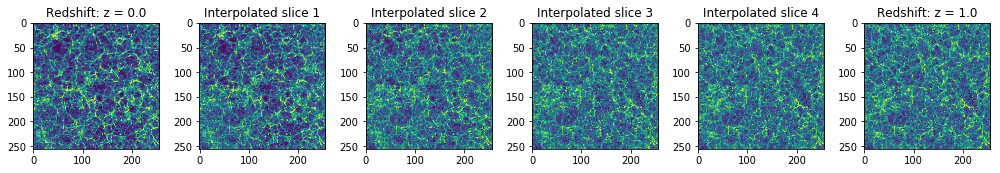

In [5]:
## Plotting some interpolated samples for visual inspection. The interpolated slices produce
## a nearly continuous transition between redshift z = 0.0 and z = 1.0

plt.figure(figsize = (14,7))
plt.subplot(1, 6, 1)
plt.imshow(np.squeeze(G_outputs[0]))
plt.title("Redshift: z = 0.0")
plt.subplot(1, 6, 2)
plt.imshow(np.squeeze(G_outputs[15]))
plt.title("Interpolated slice 1")
plt.subplot(1, 6, 3)
plt.imshow(np.squeeze(G_outputs[30]))
plt.title("Interpolated slice 2")
plt.subplot(1, 6, 4)
plt.imshow(np.squeeze(G_outputs[45]))
plt.title("Interpolated slice 3")
plt.subplot(1, 6, 5)
plt.imshow(np.squeeze(G_outputs[55]))
plt.title("Interpolated slice 4")
plt.subplot(1, 6, 6)
plt.imshow(np.squeeze(G_outputs[63]))
plt.title("Redshift: z = 1.0")
plt.tight_layout()

**Plotting the corresponding powerspectra:**

For each of the interpolated CW slices we can plot the corresponding power spectrum.

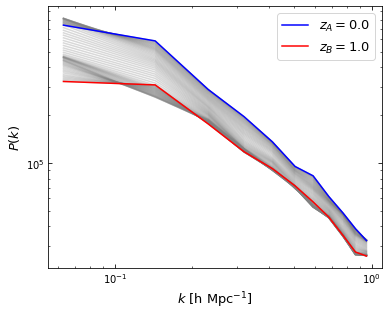

In [13]:

## The interpolated CW slices:
for i in range(len(G_outputs)):
    fig = plt.figure(1,figsize=(5.5,4.5))
    #o = cv2.GaussianBlur(outputs[i],(3,3),0)
    o = G_outputs[i]
    powerspectrum_i(o, 'gray', alpha=0.3)
    
## The two CW slices we are interpolating between:
plt.figure(1,figsize=(5.5,4.5))
powerspectrum_i(G_outputs[0],'blue',alpha = 1.0, label = r"$z_{A} = 0.0$")
powerspectrum_i(G_outputs[63],'red', alpha = 1.0, label = r"$z_{B} = 1.0$")
plt.legend(fontsize = 13)

**Interpolating between random samples:**

In [43]:
## Creating some random input vectors: 
Z1_ran = np.random.normal(size=(256))
Z2_ran = np.random.normal(size=(256))

## Interpolating:
Zs_ran = Z_interpolate(Z1_ran,Z2_ran, batch_size = 64, vector_size = 256)
G_outputs_ran = Load_samples(Zs_ran,checkpoint_dir_pt, checkpoint_epoch,output_size=256,z=256)

 [*] Reading checkpoints...
Checkpoint for  epoch epoch doesn't exist. Using latest checkpoint instead!
INFO:tensorflow:Restoring parameters from ./checkpoints/checkpoints_cw_scaled_lr_0p00003_redshift_z0p0_z1p0/run_0/dcgan.model-step-28500
 [*] Success to read dcgan.model-step-28500
 [*] Reading checkpoints...
Checkpoint for  epoch epoch doesn't exist. Using latest checkpoint instead!
INFO:tensorflow:Restoring parameters from ./checkpoints/checkpoints_cw_scaled_lr_0p00003_redshift_z0p0_z1p0/run_0/dcgan.model-step-28500
 [*] Success to read dcgan.model-step-28500


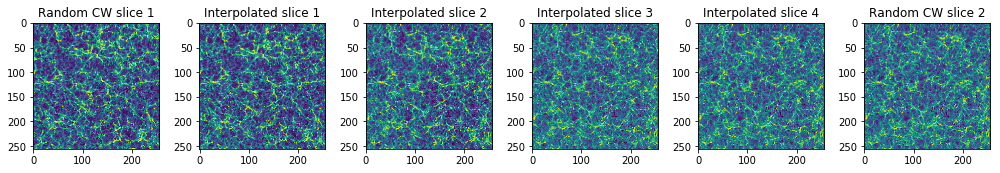

In [46]:
## Plotting some interpolated samples for visual inspection as before. In this case we are interpolating
## between two randomly chosen slices:

plt.figure(figsize = (14,7))
plt.subplot(1, 6, 1)
plt.imshow(np.squeeze(G_outputs_ran[0]))
plt.title("Random CW slice 1")
plt.subplot(1, 6, 2)
plt.imshow(np.squeeze(G_outputs_ran[15]))
plt.title("Interpolated slice 1")
plt.subplot(1, 6, 3)
plt.imshow(np.squeeze(G_outputs_ran[30]))
plt.title("Interpolated slice 2")
plt.subplot(1, 6, 4)
plt.imshow(np.squeeze(G_outputs_ran[45]))
plt.title("Interpolated slice 3")
plt.subplot(1, 6, 5)
plt.imshow(np.squeeze(G_outputs_ran[55]))
plt.title("Interpolated slice 4")
plt.subplot(1, 6, 6)
plt.imshow(np.squeeze(G_outputs_ran[63]))
plt.title("Random CW slice 2")
plt.tight_layout()